# Heart Disease - Exploratory Data Analysis

## Author: Ana Lúcia da Cunha Cox (ana.c.cox@gmail.com)

### Goals
Deep understanding of the database and insight generation.

### Dataset
This dataset dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

### Data Dictionary
    COLUMN      DESCRIPTION
    age         Person's age in years
    sex         Person's sex (1 - Male or 0 - Female)
    cp          Chest pain type (0 - Typical Angina (Heart related) 1 - Atypical Angina (Non-heart related) 2 - Non-Anginal pain (Non-heart related) 3 - Asymptomatic (No disease))
    trestbps    Resting blood pressure (in mm Hg on admission to the hospital)
    chol        Serum cholestoral in mg/dl (Healthy serum cholesterol is less than 200 mg/dL)
    fbs         Fasting blood sugar > 120 mg/dl (1 - True or 0 - False)
    restecg     Resting electrocardiographic results (values 0,1,2)
    thalach     Maximum heart rate achieved
    exang       Exercise induced angina (1 - Yes or 0 - No)
    oldpeak     Oldpeak = ST depression induced by exercise relative to rest
    slope       The slope of the peak exercise ST segment
    ca          Number of major vessels (0-3) colored by flourosopy
    thal        0 - Normal 1 - Fixed defect 2 - Reversible defect
    target      1 - Heart Problem 0 - No Heart Problem

                            ------------------------------------------------------

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import Datasets

In [2]:
heart = pd.read_csv("C:/Users/Ana Cox/Downloads/heart.csv")

## 2.1. Understanding the dataset 

In [3]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This dataset has 14 columns(13 of them are float64 and 1 is int64 type) and 1025 rows. There are no missing values.

## 2.2. Basic statistics 

#### Count
It is the total number of rows.

#### Mean
The "average" number; found by adding all data points and dividing by the number of data points.

#### Standard
The standard deviation is a measure of the amount of variation or dispersion of a set of values.

#### Min
It is the lowest value found in the database

#### 25%
The first quartile is essentially the 25th percentile; i.e 25% of the points in the data fall below that value.

#### 50%
The middle number; found by ordering all data points and picking out the one in the middle (or if there are two middle numbers, taking the mean of those two numbers).The line in the middle is the median value of the data. Median is used over the mean since it is more robust to outlier values. 

#### 75%
The third quartile is the 75th percentile; i.e 75% of the points in the data fall below that value.

#### Max
It is the highest value found in the database. 

In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 2.3. Correlation 

It is a statistical technique that can show whether and how strongly pairs of variables are related.

In [7]:
heart.corr().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


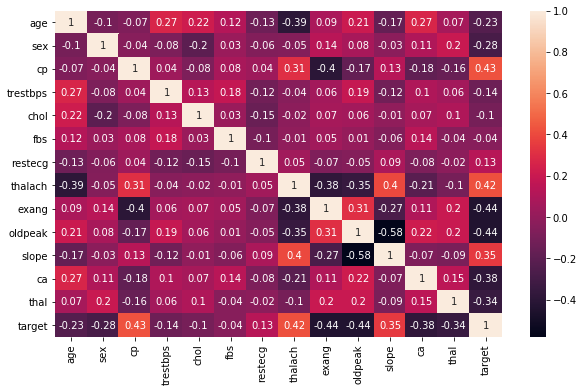

In [8]:
plt.figure(figsize=(10, 6))
heart_corr = heart.corr().round(2)
sns.heatmap(heart_corr, 
            xticklabels = heart_corr.columns.values,
            yticklabels = heart_corr.columns.values,
            annot = True);

#### Checking if there are correlations between variables greater than the statistical magic number 0.7

P.S.: In the case greater than 1, which is the variable with itself. 

In [9]:
(heart_corr > 0.7).sum()

age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         1
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
thal        1
target      1
dtype: int64

## 2.4. Covariance
It is a measure of how much two random variables vary together. It’s similar to variance, but where variance tells you how a single variable varies, co variance tells you how two variables vary together.

If the variables have a positive covariance, they tend to show a similar behavior, that is, the lowest (highest) values of variable X correspond to the lowest (highest) of variable Y. If the covariance is negative then the variables tend to show an opposite behavior, that is, the smallest (highest) values of variable X correspond to the largest (smallest) of variable Y.

In [10]:
heart.cov().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.31,-0.43,-0.67,43.09,102.89,0.39,-0.64,-81.45,0.38,2.22,-0.95,2.54,0.41,-1.04
sex,-0.43,0.21,-0.02,-0.64,-4.71,0.00,-0.01,-0.52,0.03,0.05,-0.01,0.05,0.06,-0.06
cp,-0.67,-0.02,1.06,0.69,-4.34,0.03,0.02,7.27,-0.20,-0.21,0.08,-0.19,-0.10,0.22
trestbps,43.09,-0.64,0.69,306.84,115.66,1.14,-1.14,-15.82,0.51,3.86,-1.30,1.89,0.64,-1.22
chol,102.89,-4.71,-4.34,115.66,2661.79,0.50,-4.01,-25.84,1.64,3.93,-0.45,3.95,3.21,-2.58
fbs,0.39,0.00,0.03,1.14,0.50,0.13,-0.02,-0.07,0.01,0.00,-0.01,0.05,-0.01,-0.01
restecg,-0.64,-0.01,0.02,-1.14,-4.01,-0.02,0.28,0.59,-0.02,-0.03,0.03,-0.04,-0.01,0.04
thalach,-81.45,-0.52,7.27,-15.82,-25.84,-0.07,0.59,529.26,-4.14,-9.46,5.62,-4.93,-1.40,4.87
exang,0.38,0.03,-0.20,0.51,1.64,0.01,-0.02,-4.14,0.22,0.17,-0.08,0.05,0.06,-0.10
oldpeak,2.22,0.05,-0.21,3.86,3.93,0.00,-0.03,-9.46,0.17,1.38,-0.42,0.27,0.15,-0.26


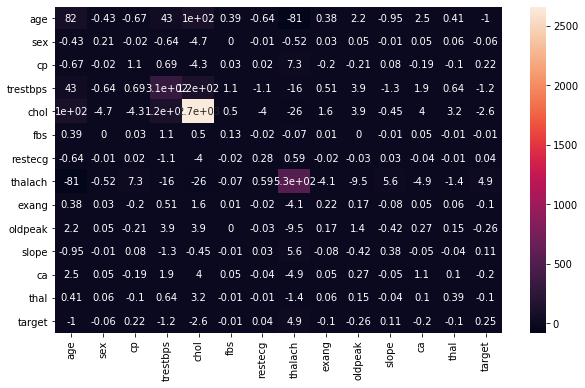

In [11]:
plt.figure(figsize=(10, 6))
heart_cov = heart.cov().round(2)
sns.heatmap(heart_cov, 
            xticklabels = heart_cov.columns.values,
            yticklabels = heart_cov.columns.values,
            annot = True);

# 3. Exploratory Data Analysis 

## 3.1. General Analysis 

#### Histogram 

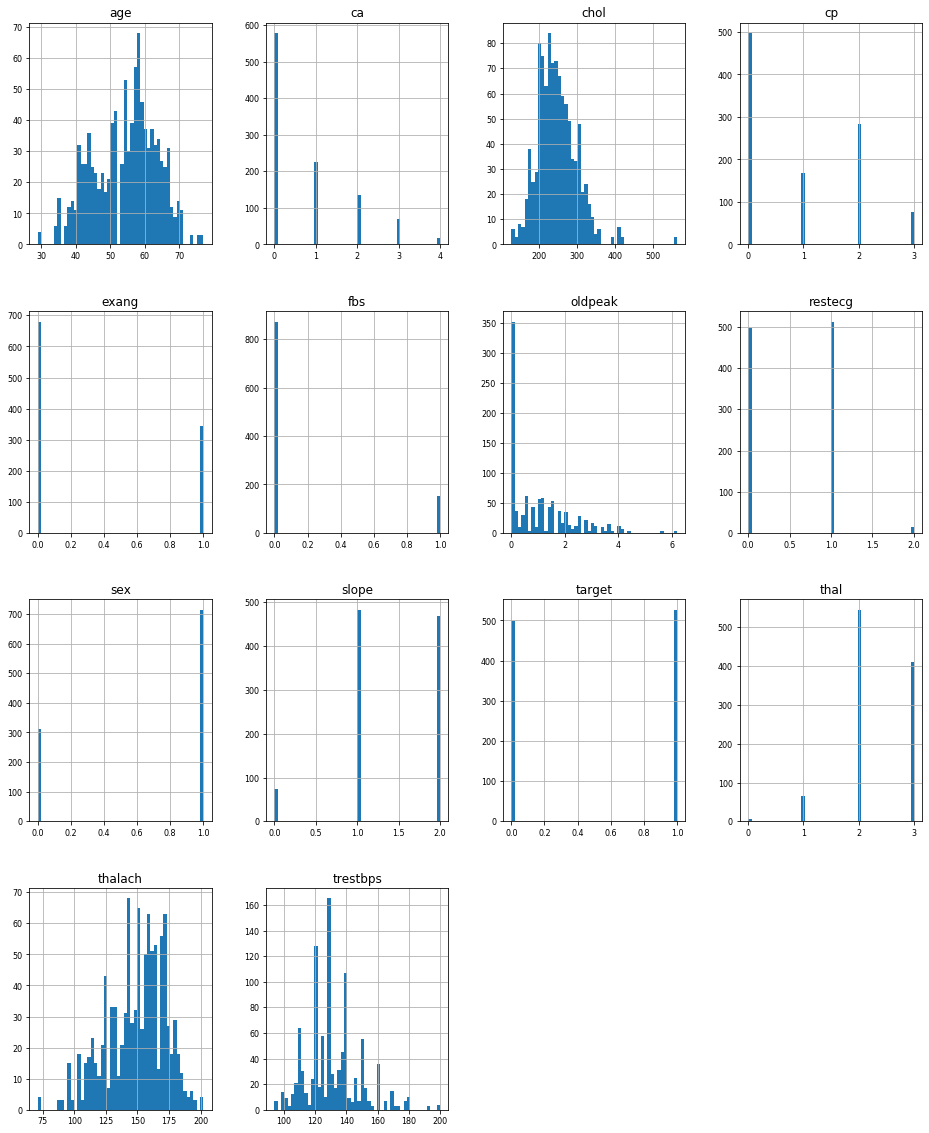

In [12]:
heart.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Feature "age" 
It is the person's age, in years. It´s a quantitative variable.

Let´s analyze statistical values: 

In [13]:
heart['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

Viewing in different charts

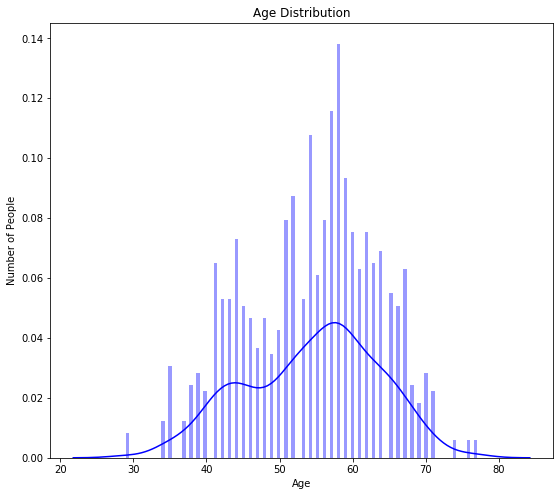

In [14]:
plt.figure(figsize=(9, 8))
sns.distplot(heart['age'], 
             color='b',
             bins=100,
             hist_kws={'alpha': 0.4});
plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Age Distribution")
plt.show()

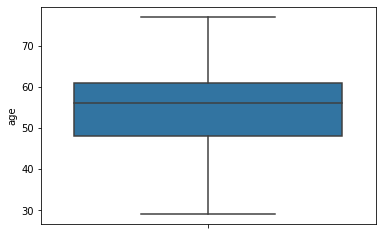

In [15]:
sns.boxplot(y='age', data=heart)

#### Feature "sex"
It is the person's gender, where:
- 0 is Female;
- 1 is Male.

It´s a qualitative variable.

The first step is change the values to string.

In [16]:
heart.sex.replace({0:'Female', 1:'Male'}, inplace=True)

Now, let´s see the frequency table:

In [17]:
sex_frequency = pd.concat([pd.DataFrame(heart['sex'].value_counts()),
                pd.DataFrame(heart['sex'].value_counts(normalize=True)*100)], 
                axis=1)

sex_frequency.columns = ['Qty sex', '% sex']
sex_frequency

,Qty sex,% sex
Male,713,69.560976
Female,312,30.439024


Viewing in a pie chart

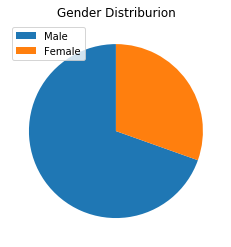

In [18]:
slices, text = plt.pie(heart.sex.value_counts(), 
                        startangle = 90)
plt.title("Gender Distriburion")
plt.legend(["Male","Female"])
plt.show()

#### Feature "cp" 
It is the chest pain type. Ha 4 values: 
- 0 is Typical Angina, what means Heart related
- 1 is Atypical Angina, what means Non-heart related
- 2 is Non-Anginal pain, what means Non-heart related
- 3 is Asymptomatic, what means No disease

It´s a qualitative variable.

The first step is change the values to string.

In [19]:
heart.cp.replace({0:'Typical Angina', 1:'Atypical Angina', 2:'Non-Anginal pain', 3:'Asymptomatic,'}, inplace=True)

Now, let´s see the frequency table:

In [20]:
cp_frequency = pd.concat([pd.DataFrame(heart['cp'].value_counts()),
                pd.DataFrame(heart['cp'].value_counts(normalize=True)*100)], 
                axis=1)

cp_frequency.columns = ['Qty Chest Pain Type', '% Chest Pain Type']
cp_frequency

,Qty Chest Pain Type,% Chest Pain Type
Typical Angina,497,48.487805
Non-Anginal pain,284,27.707317
Atypical Angina,167,16.292683
"Asymptomatic,",77,7.512195


Viewing in a pie chart

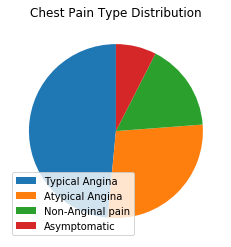

In [21]:
slices, text = plt.pie(heart.cp.value_counts(), 
                        startangle = 90)
plt.title("Chest Pain Type Distribution")
plt.legend(['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

#### Feature "trestbps"

It is the resting lood pressure (in mmHg) on admission to the hospital. It´s a quantitative variable.

Let´s analyze statistical values: 

In [22]:
heart['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

Viewing in different charts

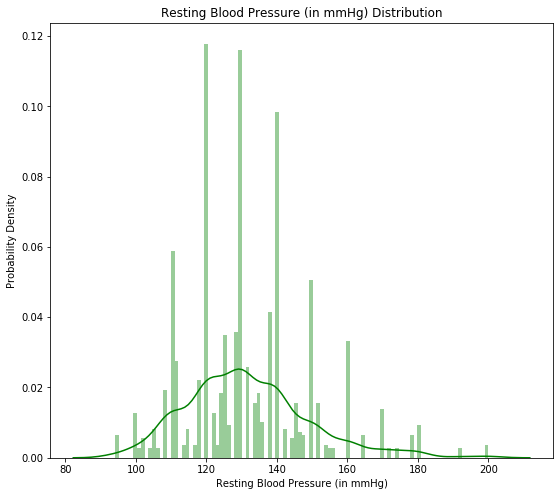

In [23]:
plt.figure(figsize=(9, 8))
sns.distplot(heart['trestbps'], 
             color='g',
             bins=100,
             hist_kws={'alpha': 0.4});
plt.xlabel("Resting Blood Pressure (in mmHg)")
plt.ylabel("Probability Density")
plt.title("Resting Blood Pressure (in mmHg) Distribution")
plt.show()

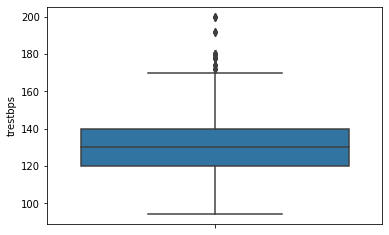

In [24]:
sns.boxplot(y='trestbps', data=heart)

#### Feature "chol"
It´s serum cholestoral in mg/dl (Healthy serum cholesterol is less than 200 mg/dL).
It´s a quantitative variable.

Let´s analyze statistical values: 

In [25]:
heart['chol'].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

Viewing in different charts

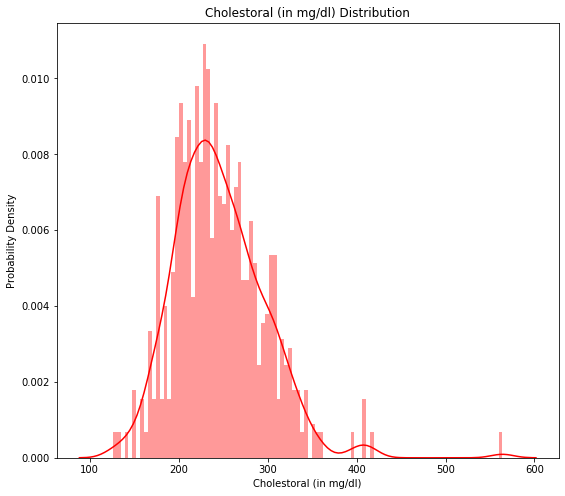

In [26]:
plt.figure(figsize=(9, 8))
sns.distplot(heart['chol'], 
             color='r',
             bins=100,
             hist_kws={'alpha': 0.4});
plt.xlabel("Cholestoral (in mg/dl)")
plt.ylabel("Probability Density")
plt.title("Cholestoral (in mg/dl) Distribution")
plt.show()

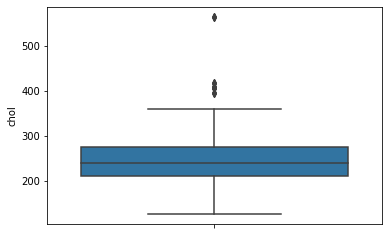

In [27]:
sns.boxplot(y='chol', data=heart)

#### Feature "fbs"
It is the Fasting blood sugar > 120 mg/dl, where:
- 1 is True
- 0 is False
It´s a qualitative variable.

The first step is change the values to string.

In [28]:
heart.fbs.replace({0:'False', 1:'True'}, inplace=True)

Frequency table

In [29]:
fbs_frequency = pd.concat([pd.DataFrame(heart['fbs'].value_counts()),
                pd.DataFrame(heart['fbs'].value_counts(normalize=True)*100)], 
                axis=1)

fbs_frequency.columns = ['Qty Fasting Blood Sugar', '% Fasting Blood Sugar']
fbs_frequency

,Qty Fasting Blood Sugar,% Fasting Blood Sugar
False,872,85.073171
True,153,14.926829


Viewing in a pie charts

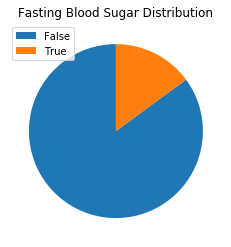

In [30]:
slices, text = plt.pie(heart.fbs.value_counts(), 
                        startangle = 90)
plt.title("Fasting Blood Sugar Distribution")
plt.legend(['False','True'])
plt.show()

#### Feature "restecg"
It is Resting electrocardiographic measurement, where:
- 0 is normal
- 1 is having ST-T wave abnormality
- 2 is showing probable or definite left ventricular hypertrophy by Estes' criteria

It´s a qualitative variable.

The first step is change the values to string.

In [31]:
heart.restecg.replace({0:'Normal', 1:'Have ST-T wave abnormality', 2:'Probable or definite left ventricular hypertrophy by Estes criteria'}, inplace=True)

Frequency table

In [32]:
restecg_frequency = pd.concat([pd.DataFrame(heart['restecg'].value_counts()),
                pd.DataFrame(heart['restecg'].value_counts(normalize=True)*100)], 
                axis=1)

restecg_frequency.columns = ['Qty Resting electrocardiographic', '% Resting electrocardiographic']
restecg_frequency

,Qty Resting electrocardiographic,% Resting electrocardiographic
Have ST-T wave abnormality,513,50.048780
Normal,497,48.487805
Probable or definite left ventricular hypertrophy by Estes criteria,15,1.463415


Viewing in a pie chart

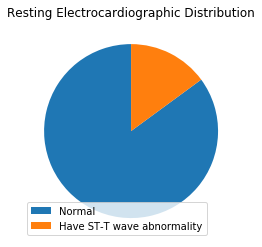

In [33]:
slices, text = plt.pie(heart.fbs.value_counts(), 
                        startangle = 90)
plt.title("Resting Electrocardiographic Distribution")
plt.legend(['Normal','Have ST-T wave abnormality','Probable or definite left ventricular hypertrophy by Estes criteria'])
plt.show()

#### Feature "thalach"
The person's maximum heart rate achieved. It´s a quantitative variable.

Let´s analyze statistical values:

In [34]:
heart['thalach'].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

Viewing in different charts

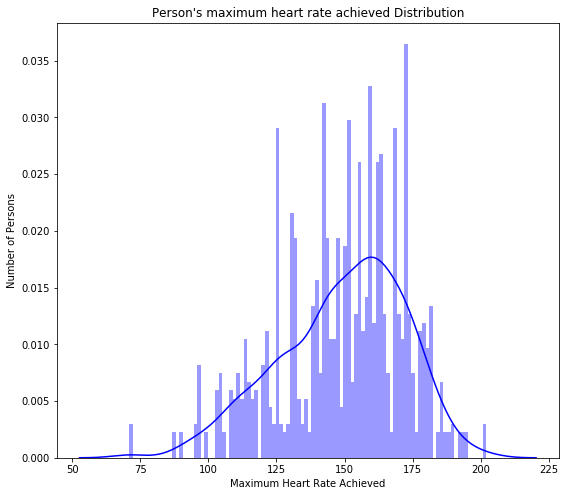

In [35]:
plt.figure(figsize=(9, 8))
sns.distplot(heart['thalach'], 
             color='b',
             bins=100,
             hist_kws={'alpha': 0.4});
plt.xlabel("Maximum Heart Rate Achieved")
plt.ylabel("Number of Persons")
plt.title("Person's maximum heart rate achieved Distribution")
plt.show()

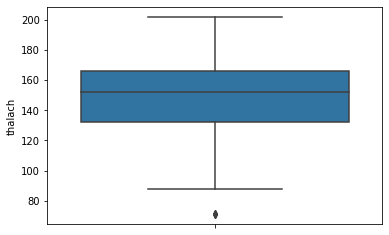

In [36]:
sns.boxplot(y='thalach', data=heart)

#### Feature "exang"
It means Exercise Induced Angina, where:
- 1 is Yes
- 0 is No
It´s a qualitative variable.

The first step is change the values to string.

In [37]:
heart.exang.replace({0:'Yes', 1:'No'}, inplace=True)

Frequency table

In [38]:
exang_frequency = pd.concat([pd.DataFrame(heart['exang'].value_counts()),
                pd.DataFrame(heart['exang'].value_counts(normalize=True)*100)], 
                axis=1)

exang_frequency.columns = ['Qty Exercise Induced Angina', '% Exercise Induced Angina']
exang_frequency

,Qty Exercise Induced Angina,% Exercise Induced Angina
Yes,680,66.341463
No,345,33.658537


Viewing in a pie chart

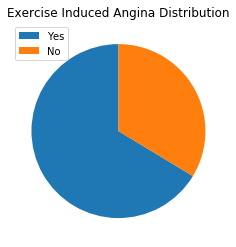

In [39]:
slices, text = plt.pie(heart.exang.value_counts(), 
                        startangle = 90)
plt.title("Exercise Induced Angina Distribution")
plt.legend(['Yes','No'])
plt.show()

#### Feature "oldpeak"
It´s ST depression induced by exercise relative to rest. It´s a quantitative variable.

Let´s analyze statistical values:

In [40]:
heart['oldpeak'].describe()

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64

Viewing in different charts

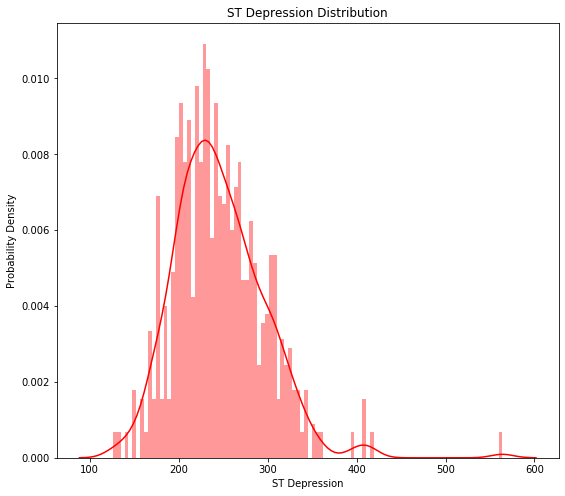

In [41]:
plt.figure(figsize=(9, 8))
sns.distplot(heart['chol'], 
             color='r',
             bins=100,
             hist_kws={'alpha': 0.4});
plt.xlabel("ST Depression")
plt.ylabel("Probability Density")
plt.title("ST Depression Distribution")
plt.show()

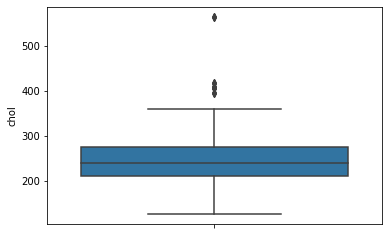

In [42]:
sns.boxplot(y='chol', data=heart)

#### Feature "slope"
It´s the slope of the peak exercise ST segment, where:
- 0 is upsloping
- 1 is flat
- 2 is downsloping

It´s a qualitative variable.

The first step is change the values to string.

In [43]:
heart.slope.replace({0:'Upsloping', 1:'Flat', 2:'Downsloping'}, inplace=True)

Frequency table

In [44]:
slope_frequency = pd.concat([pd.DataFrame(heart['slope'].value_counts()),
                pd.DataFrame(heart['slope'].value_counts(normalize=True)*100)], 
                axis=1)

slope_frequency.columns = ['Qty Slope', '% Slope']
slope_frequency

,Qty Slope,% Slope
Flat,482,47.024390
Downsloping,469,45.756098
Upsloping,74,7.219512


Viewing in a pie chart

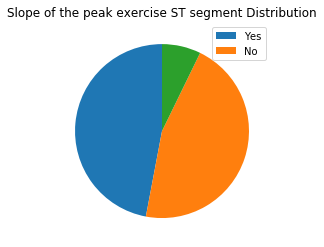

In [45]:
slices, text = plt.pie(heart.slope.value_counts(), 
                        startangle = 90)
plt.title("Slope of the peak exercise ST segment Distribution")
plt.legend(['Yes','No'])
plt.show()

#### Feature "ca"
Number of major vessels (0-3) colored by flourosopy. It´s a qualitative variable.

Let´s analyze statistical values:

In [46]:
heart['ca'].describe()

count    1025.000000
mean        0.754146
std         1.030798
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         4.000000
Name: ca, dtype: float64

Viewing in different charts

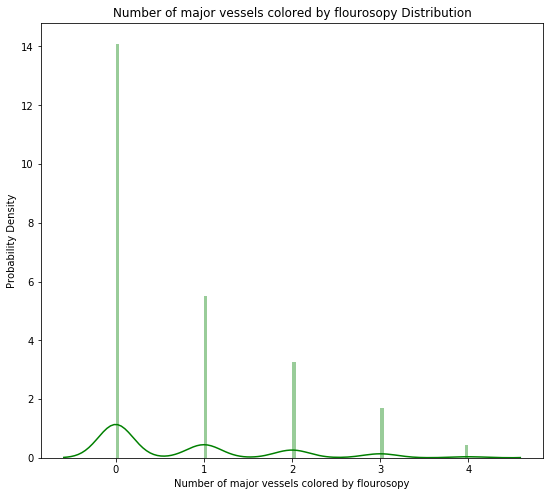

In [47]:
plt.figure(figsize=(9, 8))
sns.distplot(heart['ca'], 
             color='g',
             bins=100,
             hist_kws={'alpha': 0.4});
plt.xlabel("Number of major vessels colored by flourosopy")
plt.ylabel("Probability Density")
plt.title("Number of major vessels colored by flourosopy Distribution")
plt.show()

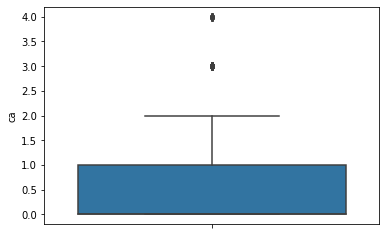

In [48]:
sns.boxplot(y='ca', data=heart)

#### Feature "thal"
It is a blood disorder called thalassemia, where:
- 3 is Normal
- 6 is Fixed defect
- 7 is Reversible defect
It´s a qualitative variable.

The first step is change the values to string.

In [49]:
heart.thal.replace({3:'Normal', 6:'Fixed defect', 7:'Reversible defect'}, inplace=True)

Frequency table

In [50]:
thal_frequency = pd.concat([pd.DataFrame(heart['thal'].value_counts()),
                pd.DataFrame(heart['thal'].value_counts(normalize=True)*100)], 
                axis=1)

thal_frequency.columns = ['Qty thalassemia', '% thalassemia']
thal_frequency

,Qty thalassemia,% thalassemia
2,544,53.073171
Normal,410,40.000000
1,64,6.243902
0,7,0.682927


Viewing in a pie charts

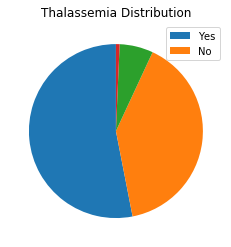

In [51]:
slices, text = plt.pie(heart.thal.value_counts(), 
                        startangle = 90)
plt.title("Thalassemia Distribution")
plt.legend(['Yes','No'])
plt.show()

#### Feature "target"
- 0 is No Heart Problem
- 1 is Heart Problem

It´s a qualitative variable.

The first step is change the values to string.

In [52]:
heart.target.replace({0:'No Heart Problem', 1:'Heart Problem'}, inplace=True)

Frequency table

In [53]:
target_frequency = pd.concat([pd.DataFrame(heart['target'].value_counts()),
                   pd.DataFrame(heart['target'].value_counts(normalize=True)*100)], 
                   axis=1)

target_frequency.columns = ['Qty target', '% target']
target_frequency

,Qty target,% target
Heart Problem,526,51.317073
No Heart Problem,499,48.682927


Viewing in a pie charts

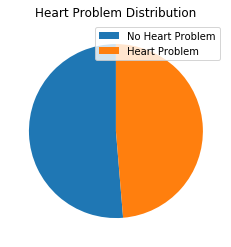

In [54]:
slices, text = plt.pie(heart.target.value_counts(), 
                        startangle = 90)
plt.title("Heart Problem Distribution")
plt.legend(['No Heart Problem','Heart Problem'])
plt.show()

## 3.2. Specific Analysis 

####  Age *versus* Maximum heart rate achieved ("thalach")

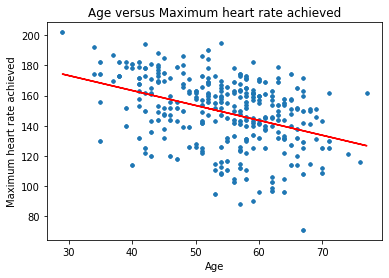

In [55]:
m, b = np.polyfit(heart["age"], heart["thalach"], 1)
plt.plot(heart["age"], heart["thalach"], '.')
plt.plot(heart["age"], m*heart["age"] + b, '-', color = "red")
plt.xlabel("Age")
plt.ylabel("Maximum heart rate achieved")
plt.title("Age versus Maximum heart rate achieved")
plt.show()

The maximum heart rate achieved tends to decrease with age.

#### Proportion of target by age and gender

In [56]:
cross_age_sex_target = pd.crosstab([heart.age,heart.sex],heart.target)
pd.set_option('display.max_rows', None)
cross_age_sex_target

target      Heart Problem  No Heart Problem
age sex                                    
29  Male                4                 0
34  Female              3                 0
    Male                3                 0
35  Female              4                 0
    Male                4                 7
37  Female              3                 0
    Male                3                 0
38  Male                8                 4
39  Female              7                 0
    Male                3                 4
40  Male                3                 8
41  Female             12                 0
    Male               17                 3
42  Female              6                 0
    Male               16                 4
43  Female              3                 4
    Male               12                 7
44  Female              6                 0
    Male               20                10
45  Female             10                 0
    Male                9                 6
46  Female              9                 0
    Male                3                11
47  Male               10                 8
48  Female              3                 0
    Male                9                11
49  Female              6                 0
    Male                3                 8
50  Female              9                 0
    Male                3                 9
51  Female              9                 3
    Male               20                 7
52  Female              3                 0
    Male               25                15
53  Female              9                 0
    Male                9                 8
54  Female             15                 0
    Male               17                21
55  Female              7                 8
    Male                3                12
56  Female              3                 7
    Male               14                15
57  Female              6                 6
    Male               15                30
58  Female             13                 8
    Male               11                36
59  Female              0                 3
    Male               15                28
60  Female             10                 3
    Male                0                24
61  Female              0                 8
    Male                3                20
62  Female              7                17
    Male                6                 7
63  Female              6                11
    Male                3                12
64  Female              9                 0
    Male               10                15
65  Female              9                 4
    Male                3                11
66  Female              7                 4
    Male                7                 7
67  Female              9                 0
    Male                0                22
68  Female              3                 0
    Male                3                 6
69  Female              3                 0
    Male                3                 3
70  Male                3                11
71  Female             11                 0
74  Female              3                 0
76  Female              3                 0
77  Male                0                 3

Text(0, 0.5, 'Quantity')

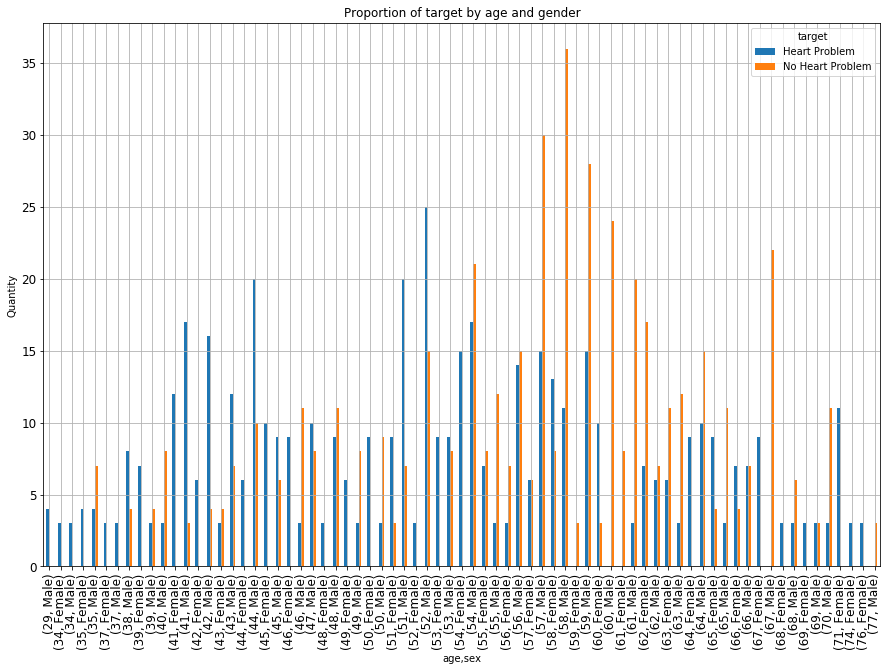

In [57]:
cross_age_sex_target.plot(kind='bar', 
                          title ="Proportion of target by age and gender", 
                          figsize=(15, 10), 
                          legend=True, 
                          fontsize=12).grid()
plt.ylabel('Quantity')

52 years old mens has more chances to heart disease than woman in the same age.

#### Proportion of target by cp and age

In [58]:
cross_cp_age_target = pd.crosstab([heart.cp,heart.age],heart.target)
pd.set_option('display.max_rows', None)
cross_cp_age_target

target                Heart Problem  No Heart Problem
cp               age                                 
Asymptomatic,    34               3                 0
                 38               0                 4
                 40               3                 0
                 42               3                 0
                 45               0                 3
                 51               3                 0
                 52               7                 0
                 56               3                 0
                 58               3                 0
                 59               3                11
                 60               4                 0
                 61               0                 4
                 63               3                 0
                 64               7                 0
                 65               0                 4
                 66               3                 0
                 69               6                 0
Atypical Angina  29               4                 0
                 34               3                 0
                 35               4                 0
                 41              20                 0
                 42               3                 0
                 44              10                 0
                 45              10                 0
                 46               6                 0
                 48               3                 4
                 49               6                 0
                 50               3                 0
                 52               9                 0
                 54               7                 3
                 55              10                 0
                 56              14                 0
                 57               0                11
                 58               4                 8
                 59               3                 0
                 62               3                 4
                 63               3                 0
                 66               0                 3
                 70               3                 0
                 71               3                 0
                 74               3                 0
Non-Anginal pain 37               6                 0
                 38               8                 0
                 39              10                 0
                 41               9                 0
                 42              10                 0
                 43               6                 0
                 44              16                 0
                 46               3                 3
                 47               7                 4
                 48               6                 0
                 49               0                 8
                 50               6                 3
                 51              23                 0
                 52               9                 0
                 53               9                 0
                 54              22                 0
                 56               0                 4
                 57               6                 4
                 58              10                 7
                 59               3                 4
                 60               6                 3
                 61               3                 0
                 62               3                 4
                 63               3                 0
                 64               3                 8
                 65               9                 0
                 66               4                 0
                 67               6                 4
                 68               6                 3
                 69               0                 3
                 70               0                 3
    

Text(0, 0.5, 'Quantity')

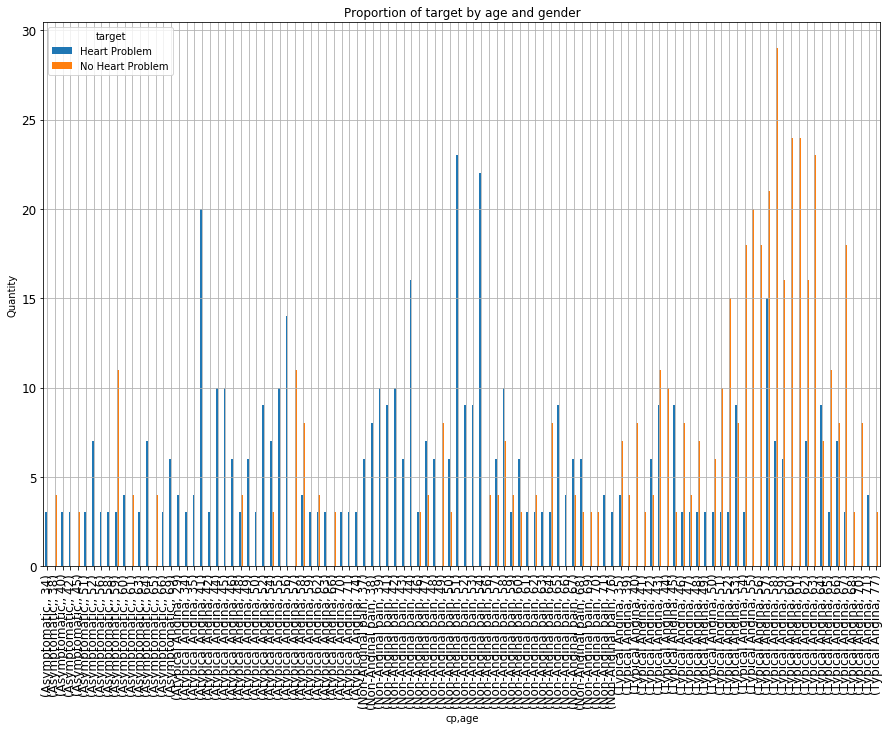

In [59]:
cross_cp_age_target.plot(kind='bar', 
                         title ="Proportion of target by age and gender", 
                         figsize=(15, 10), 
                         legend=True, 
                         fontsize=12).grid()
plt.ylabel('Quantity')

## 3.3. Creating a relationship between features and "target" 

#### Proportion of target by age

In [60]:
cross_age_target = pd.crosstab(heart["age"],heart["target"],margins=True)
cross_age_target

target,Heart Problem,No Heart Problem,All
age,,,
29,4,0,4
34,6,0,6
35,8,7,15
37,6,0,6
38,8,4,12
39,10,4,14
40,3,8,11
41,29,3,32
42,22,4,26


Text(0, 0.5, 'Quantity')

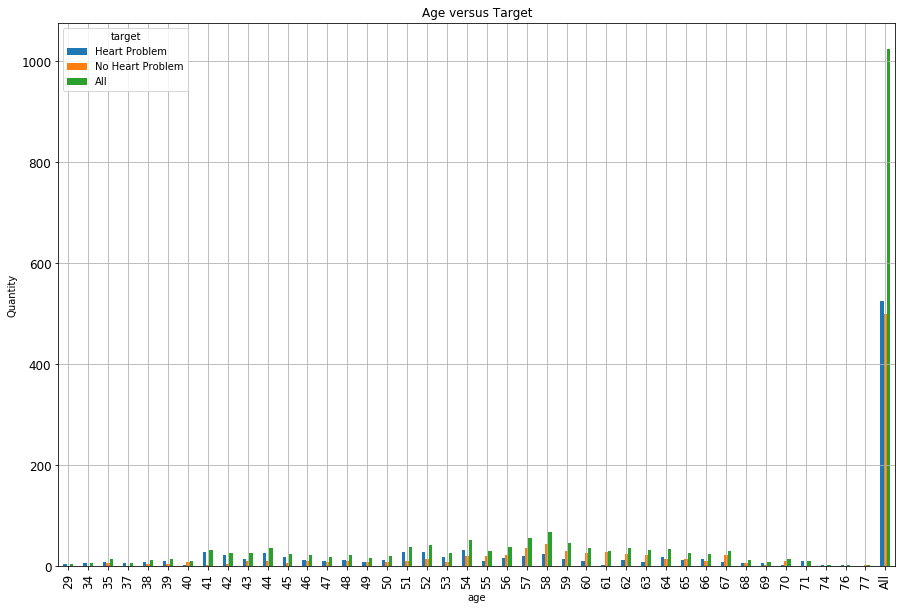

In [61]:
cross_age_target.plot(kind='bar', 
                      title ="Age versus Target", 
                      figsize=(15, 10), 
                      legend=True, 
                      fontsize=12).grid()
plt.ylabel('Quantity')

It is noticed that at 54 years of age there is a greater chance of heart disease (32 occurrences in the dataset), followed by 51 and 41 years (both with 29 occurrences).

#### Box-plot target by age

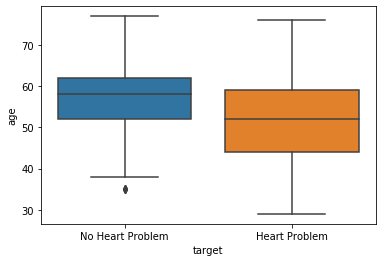

In [62]:
sns.boxplot(x='target',y='age', data=heart)

There are outliers for records WITHOUT heart disease.

#### Proportion of target by sex

In [63]:
cross_sex_target = pd.crosstab(heart["sex"],heart["target"],margins=True)
cross_sex_target

target,Heart Problem,No Heart Problem,All
sex,,,
Female,226,86,312
Male,300,413,713
All,526,499,1025


Text(0, 0.5, 'Quantity')

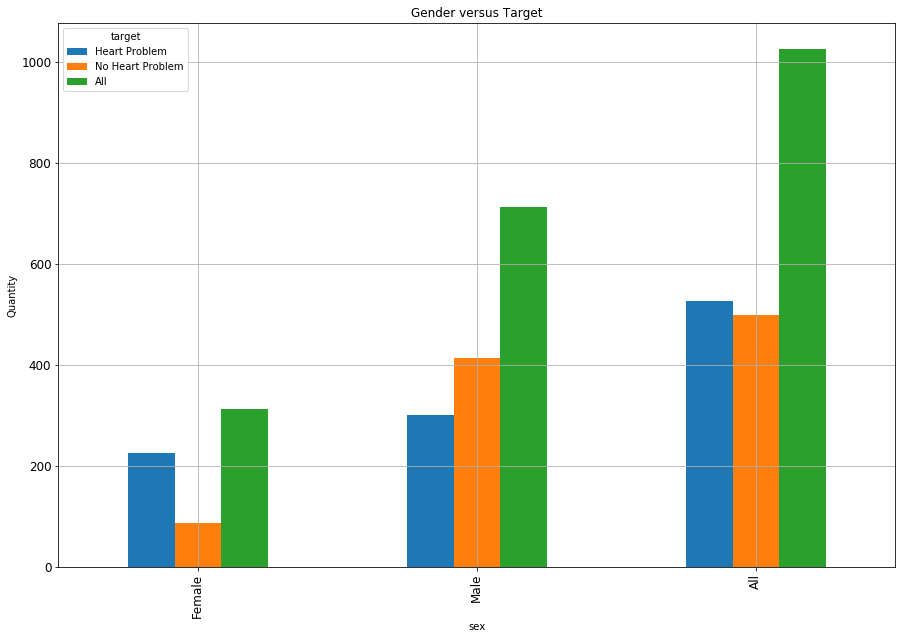

In [64]:
cross_sex_target.plot(kind='bar', 
                      title ="Gender versus Target", 
                      figsize=(15, 10), 
                      legend=True, 
                      fontsize=12).grid()
plt.ylabel('Quantity')

There are more women with heart disease (226 *versus* 86, of a total 312) than men (300 *versus* 413, total 713)

#### Proportion of target by cp

In [65]:
cross_cp_target = pd.crosstab(heart["cp"],heart["target"],margins=True)
cross_cp_target

target,Heart Problem,No Heart Problem,All
cp,,,
"Asymptomatic,",51,26,77
Atypical Angina,134,33,167
Non-Anginal pain,219,65,284
Typical Angina,122,375,497
All,526,499,1025


Text(0, 0.5, 'Quantity')

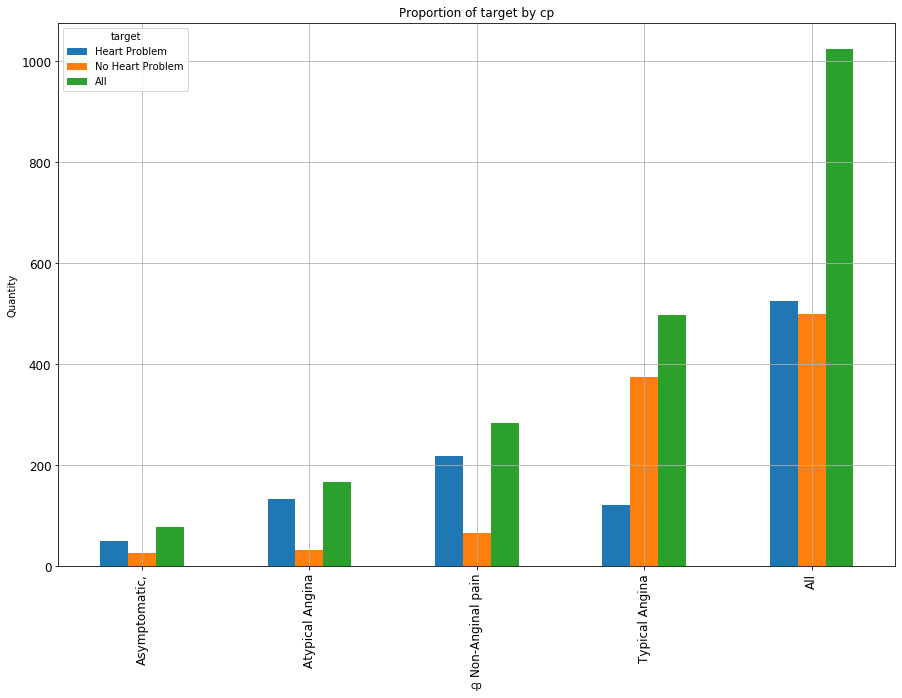

In [66]:
cross_cp_target.plot(kind='bar', 
                     title ="Proportion of target by cp", 
                     figsize=(15, 10), 
                     legend=True, 
                     fontsize=12).grid()
plt.ylabel('Quantity')

#### Proportion of target by cp and gender

In [67]:
cross_cp_sex_target = pd.crosstab([heart.cp,heart.sex],heart.target)
pd.set_option('display.max_rows', None)
cross_cp_sex_target

target                   Heart Problem  No Heart Problem
cp               sex                                    
Asymptomatic,    Female             13                 0
                 Male               38                26
Atypical Angina  Female             50                 7
                 Male               84                26
Non-Anginal pain Female            105                 4
                 Male              114                61
Typical Angina   Female             58                75
                 Male               64               300

Text(0, 0.5, 'Quantity')

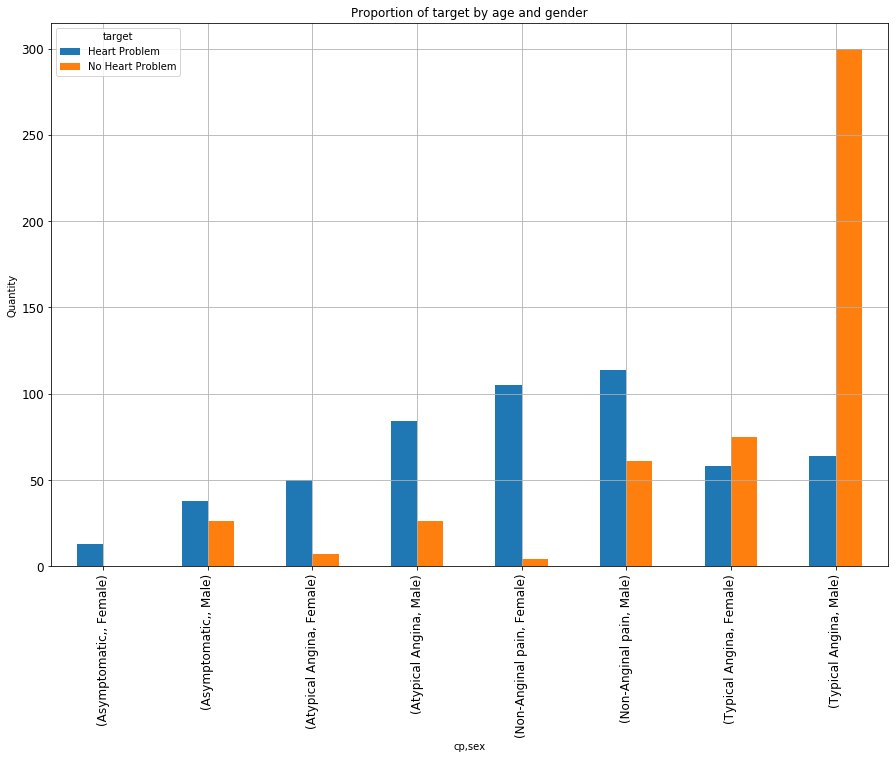

In [68]:
cross_cp_sex_target.plot(kind='bar', 
                        title ="Proportion of target by age and gender", 
                        figsize=(15, 10), 
                        legend=True, 
                        fontsize=12).grid()
plt.ylabel('Quantity')

Non-Anginal Pain on males is much higher than in woman.

#### Proportion of target by trestbps

In [69]:
cross_trestbps_target = pd.crosstab(heart["trestbps"],heart["target"],margins=True)
cross_trestbps_target

target,Heart Problem,No Heart Problem,All
trestbps,,,
94,7,0,7
100,7,7,14
101,3,0,3
102,6,0,6
104,3,0,3
105,9,0,9
106,3,0,3
108,13,8,21
110,25,39,64


Text(0, 0.5, 'Quantity')

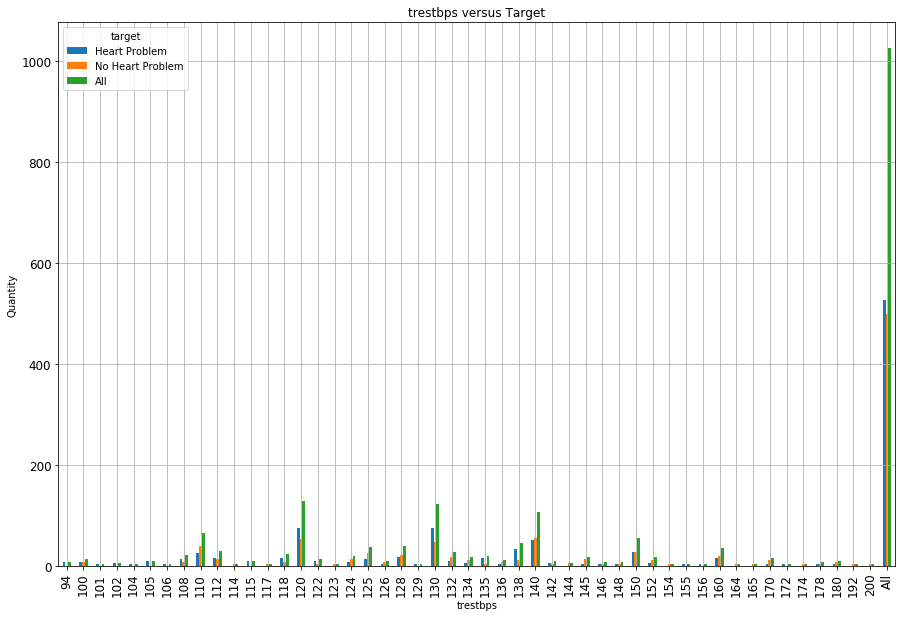

In [70]:
cross_trestbps_target.plot(kind='bar', 
                      title ="trestbps versus Target", 
                      figsize=(15, 10), 
                      legend=True, 
                      fontsize=12).grid()
plt.ylabel('Quantity')

#### Box-plot target by trestbps

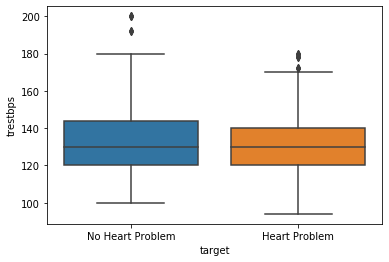

In [71]:
sns.boxplot(x='target',y='trestbps', data=heart)

#### Proportion of target by chol

In [72]:
cross_chol_target = pd.crosstab(heart["chol"],heart["target"],margins=True)
cross_chol_target

target,Heart Problem,No Heart Problem,All
chol,,,
126,3,0,3
131,0,3,3
141,3,0,3
149,4,4,8
157,4,0,4
160,3,0,3
164,0,3,3
166,0,4,4
167,0,4,4


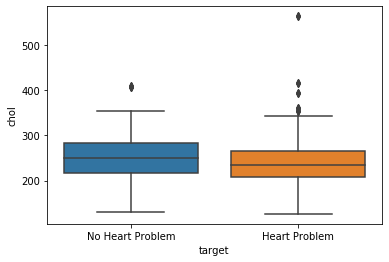

In [73]:
sns.boxplot(x='target',y='chol', data=heart)

#### Proportion of target by FBS

In [74]:
cross_fbs_target = pd.crosstab(heart["fbs"],heart["target"],margins=True)
cross_fbs_target

target,Heart Problem,No Heart Problem,All
fbs,,,
False,455,417,872
True,71,82,153
All,526,499,1025


Text(0, 0.5, 'Quantity')

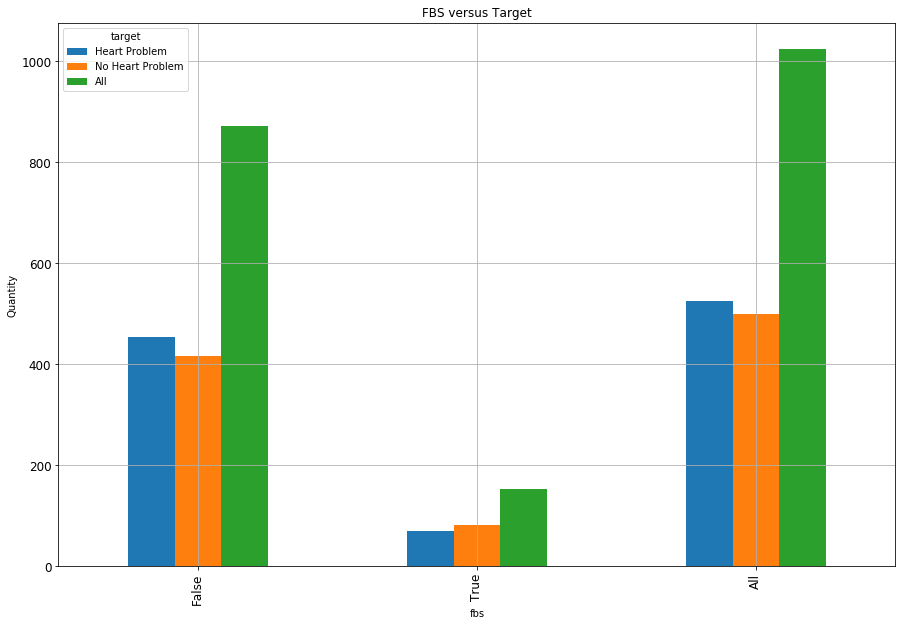

In [75]:
cross_fbs_target.plot(kind='bar', 
                      title ="FBS versus Target", 
                      figsize=(15, 10), 
                      legend=True, 
                      fontsize=12).grid()
plt.ylabel('Quantity')

#### Proportion of target by restecg

In [76]:
cross_restecg_target = pd.crosstab(heart["restecg"],heart["target"],margins=True)
cross_restecg_target

target,Heart Problem,No Heart Problem,All
restecg,,,
Have ST-T wave abnormality,309,204,513
Normal,214,283,497
Probable or definite left ventricular hypertrophy by Estes criteria,3,12,15
All,526,499,1025


Text(0, 0.5, 'Quantity')

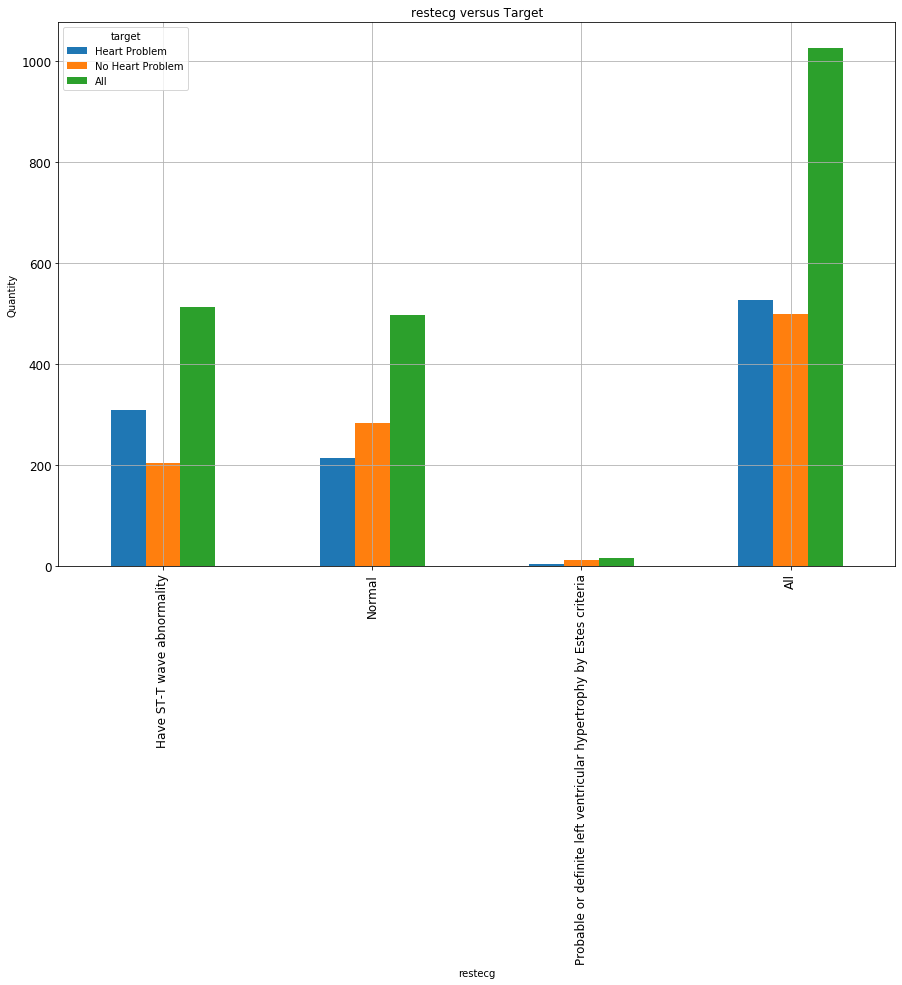

In [77]:
cross_restecg_target.plot(kind='bar', 
                     title ="restecg versus Target", 
                     figsize=(15, 10), 
                     legend=True, 
                     fontsize=12).grid()
plt.ylabel('Quantity')

#### Proportion of target by Thalach

In [78]:
cross_thalach_target = pd.crosstab(heart["thalach"],heart["target"],margins=True)
cross_thalach_target

target,Heart Problem,No Heart Problem,All
thalach,,,
71,0,4,4
88,0,3,3
90,0,3,3
95,0,4,4
96,3,4,7
97,0,4,4
99,0,3,3
103,0,8,8
105,3,7,10


Text(0, 0.5, 'Quantity')

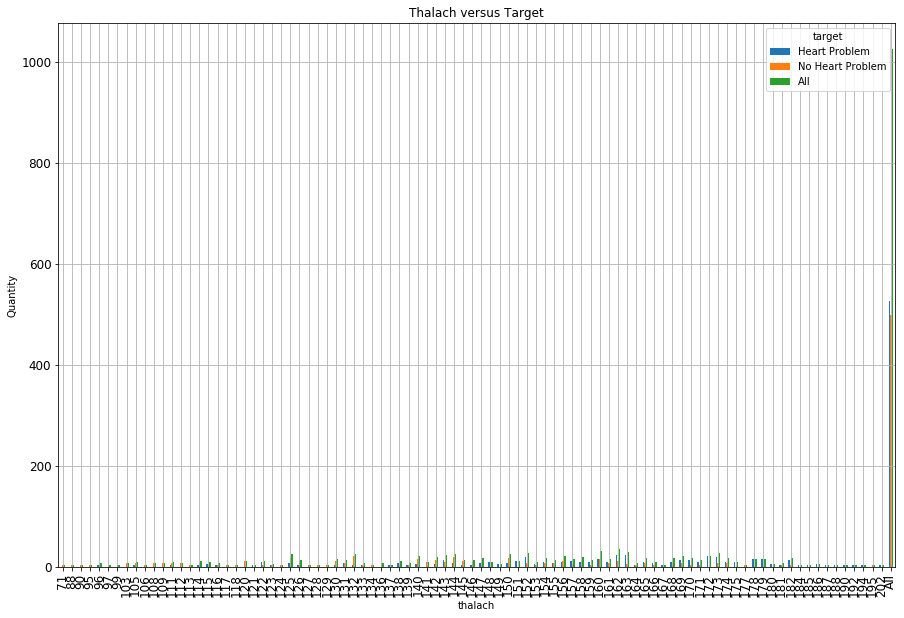

In [79]:
cross_thalach_target.plot(kind='bar', 
                      title ="Thalach versus Target", 
                      figsize=(15, 10), 
                      legend=True, 
                      fontsize=12).grid()
plt.ylabel('Quantity')

#### Box-plot target by Thalach

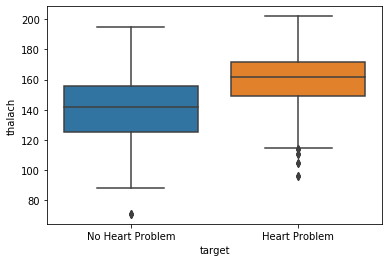

In [80]:
sns.boxplot(x='target',y='thalach', data=heart)

#### Proportion of target by exang

In [81]:
cross_exang_target = pd.crosstab(heart["exang"],heart["target"],margins=True)
cross_exang_target

target,Heart Problem,No Heart Problem,All
exang,,,
No,71,274,345
Yes,455,225,680
All,526,499,1025


Text(0, 0.5, 'Quantity')

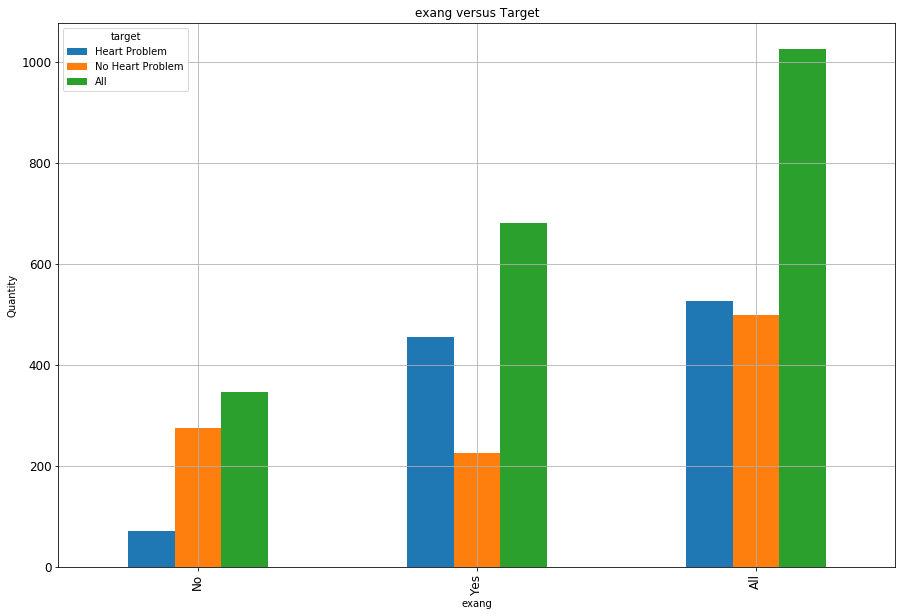

In [82]:
cross_exang_target.plot(kind='bar', 
                        title ="exang versus Target", 
                        figsize=(15, 10), 
                        legend=True, 
                        fontsize=12).grid()
plt.ylabel('Quantity')

#### Proportion of target by Oldpeak

In [83]:
cross_oldpeak_target = pd.crosstab(heart["oldpeak"],heart["target"],margins=True)
cross_oldpeak_target

target,Heart Problem,No Heart Problem,All
oldpeak,,,
0.0,242,87,329
0.1,12,11,23
0.2,27,10,37
0.3,6,4,10
0.4,26,4,30
0.5,12,3,15
0.6,33,14,47
0.7,3,0,3
0.8,21,23,44


Text(0, 0.5, 'Quantity')

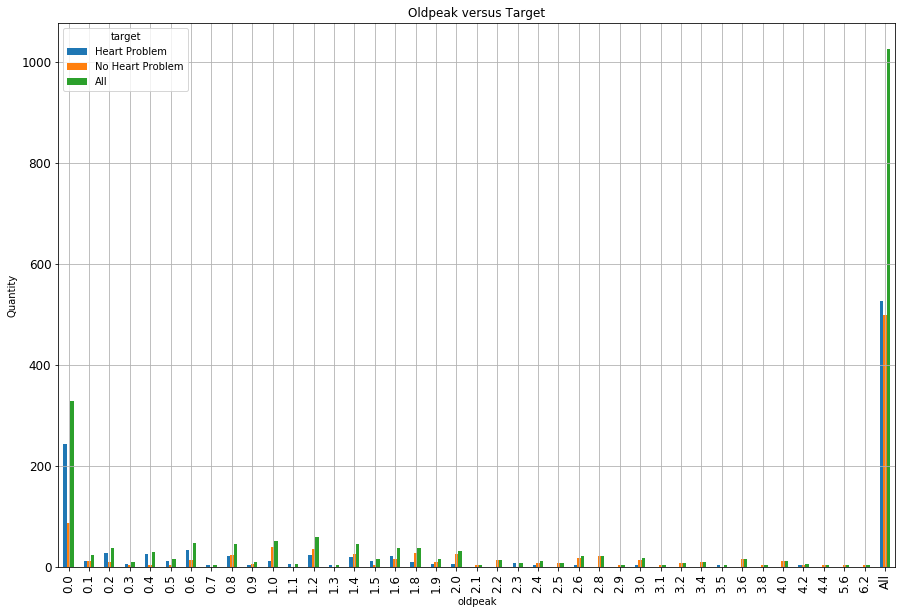

In [84]:
cross_oldpeak_target.plot(kind='bar', 
                      title ="Oldpeak versus Target", 
                      figsize=(15, 10), 
                      legend=True, 
                      fontsize=12).grid()
plt.ylabel('Quantity')

#### Box-plot target by Oldpeak

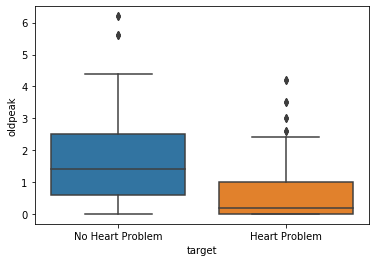

In [85]:
sns.boxplot(x='target',y='oldpeak', data=heart)

# 4. Creation of new features

## 4.1 Feature "age_range" 
- 0-40 = 0
- 41-60 = 1
- 61-80 = 2

In [86]:
heart.loc[heart["age"] <=40, 'age_range'] = 0
heart.loc[((heart["age"] >40) * (heart["age"] <=60)), 'age_range'] = 1
heart.loc[((heart["age"] >60) * (heart["age"] <=80)), 'age_range'] = 2

C:\Users\Ana Cox\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [87]:
heart["age_range"].value_counts()

1.0    685
2.0    272
0.0     68
Name: age_range, dtype: int64

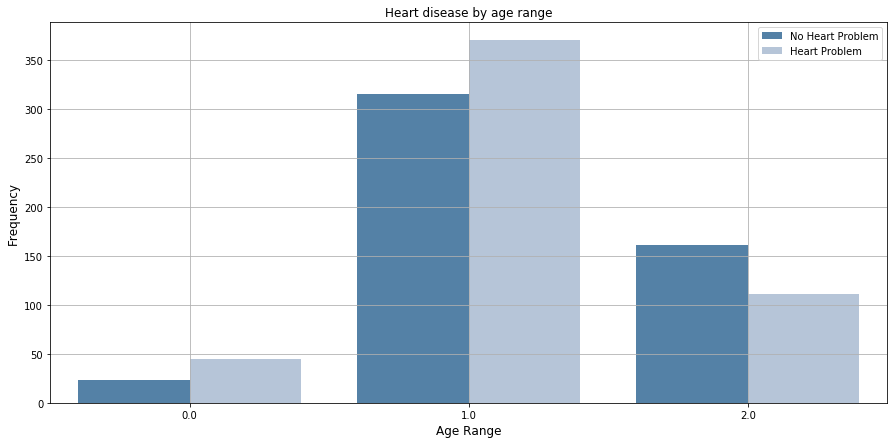

In [88]:
# Relação da idade do paciente com Doença cardíaca 

palette1 = ['#4682B4', '#B0C4DE', '#708090', '#778899', 'BlueViolet']
fig, axe = plt.subplots(figsize=(15,7))

axe = sns.countplot(x='age_range', data=heart, hue='target', palette=palette1)
axe.set_xlabel('Age Range', fontsize=12)
axe.set_ylabel('Frequency', fontsize=12)
axe.set_title('Heart disease by age range')
axe.legend(loc='upper right', fontsize=10)
axe.grid()

#### Visualization of dataset 

In [89]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range
0,52,Male,Typical Angina,125,212,False,Have ST-T wave abnormality,168,Yes,1.0,Downsloping,2,Normal,No Heart Problem,1.0
1,53,Male,Typical Angina,140,203,True,Normal,155,No,3.1,Upsloping,0,Normal,No Heart Problem,1.0
2,70,Male,Typical Angina,145,174,False,Have ST-T wave abnormality,125,No,2.6,Upsloping,0,Normal,No Heart Problem,2.0
3,61,Male,Typical Angina,148,203,False,Have ST-T wave abnormality,161,Yes,0.0,Downsloping,1,Normal,No Heart Problem,2.0
4,62,Female,Typical Angina,138,294,True,Have ST-T wave abnormality,106,Yes,1.9,Flat,3,2,No Heart Problem,2.0
5,58,Female,Typical Angina,100,248,False,Normal,122,Yes,1.0,Flat,0,2,Heart Problem,1.0
6,58,Male,Typical Angina,114,318,False,Probable or definite left ventricular hypertro...,140,Yes,4.4,Upsloping,3,1,No Heart Problem,1.0
7,55,Male,Typical Angina,160,289,False,Normal,145,No,0.8,Flat,1,Normal,No Heart Problem,1.0
8,46,Male,Typical Angina,120,249,False,Normal,144,Yes,0.8,Downsloping,0,Normal,No Heart Problem,1.0
9,54,Male,Typical Angina,122,286,False,Normal,116,No,3.2,Flat,2,2,No Heart Problem,1.0


# 5. Addicionaly Biography